Define the data folder for the 2019 dataset, read and concatenate them.
This notebook ran in Kaggle to use a GPU for acceleration.
We will also keep the listing_id to use it for the bonus exercise.
By using it we will be able to find the neighborhood.

In [1]:
import pandas as pd
import os

# Define the path to the folders
folders = [
    '/kaggle/input/dataset-tede/data/2019/april', 
    '/kaggle/input/dataset-tede/data/2019/febrouary', 
    '/kaggle/input/dataset-tede/data/2019/march'
]

# Initialize an empty DataFrame to store the concatenated results
df_2019 = pd.DataFrame()

# Function to read and concatenate CSV files from a given folder
def read_and_concatenate(folder):
    folder_path = os.path.join(folder)
    df = pd.read_csv(os.path.join(folder_path, 'reviews.csv'), low_memory=False)
    
    df = df[['comments','listing_id']]
    
    return df

# Iterate through each folder and concatenate the CSV files
for folder in folders:
    df_2019 = pd.concat([df_2019, read_and_concatenate(folder)], ignore_index=True)


df_2019.head()

,comments,listing_id
0,"The apartment was wonderful, fully equiped, be...",10595
1,Emmanouil was an excellent host. He provided u...,10595
2,"Manos is a very good host, he is kind and help...",10595
3,"Our stay in Emmanouil home was comfortable, qu...",10595
4,Fantastic accommodation very well located to v...,10595


Define the data folder for the 2023 dataset, read, filter by date, and concatenate them.
Keep only ears that are after 2020 so the reviews are not overlapping with those of the 2019 dataset.

In [2]:
# Define the path to the folders
folders = [
    '/kaggle/input/dataset-tede/data/2023/june', 
    '/kaggle/input/dataset-tede/data/2023/march', 
    '/kaggle/input/dataset-tede/data/2023/september'
]

# Initialize an empty DataFrame to store the concatenated results
df_2023 = pd.DataFrame()

# Function to read and concatenate CSV files from a given folder
def read_and_sample(folder):
    folder_path = os.path.join(folder)
    df = pd.read_csv(os.path.join(folder_path, 'reviews.csv'), low_memory=False)
    
    df = df[['comments', 'date','listing_id']]
    
    # Convert 'date' column to datetime
    df['date'] = pd.to_datetime(df['date'])
    
    # Filter to include only dates from 2020 onwards
    df = df[df['date'].dt.year >= 2020]
    
    
    return df

# Iterate through each folder and concatenate the sampled CSV files
for folder in folders:
    df_2023 = pd.concat([df_2023, read_and_sample(folder)], ignore_index=True)

# Drop the 'date' column as it's no longer needed
df_2023 = df_2023.drop(columns=['date'])

df_2023.head()

,comments,listing_id
0,A great apartment with everything you could po...,10595
1,Ο Emmanouil είναι εξαιρετικός οικοδεσπότης. Ότ...,10595
2,Εξαιρετικά όλα!!!,10595
3,Πολυ φιλοξενος χωρος και ο οικοδεσποτης προθυμ...,10595
4,"Очень приветливый хозяин, встретил достаточно ...",10595


In [3]:
print(len(df_2019))
print(len(df_2023))

843877
1000437


Keep only the first 10000 lines of the two dataset, this is done for faster pre-processing and training.

In [4]:
df_2019 = df_2019.head(10000)
df_2023 = df_2023.head(10000)

In [ ]:
!pip install langdetect

Define functions to detect the language of comments and keep only english comments, clean individual comments by removing URLs, user references, punctuation, emojis, stop words, and extra whitespace, and filter and clean the DataFrame.

In [ ]:
import re
import string
from langdetect import detect
import nltk
from nltk.corpus import stopwords
import emoji
import pandas as pd

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Function to detect the language of a comment
def is_english(comment):
    try:
        return detect(comment) == 'en'
    except:
        return False

# Function to clean a single comment
def clean_comment(comment):
    # Remove URLs
    comment = re.sub(r'http\S+|www\S+|https\S+', '', comment, flags=re.MULTILINE)
    # Remove user @ references and '#'
    comment = re.sub(r'\@\w+|\#','', comment)
    # Remove punctuation
    comment = comment.translate(str.maketrans('', '', string.punctuation))
    # Remove emoji
    comment = emoji.replace_emoji(comment, replace='')
    # Remove stop words
    comment = ' '.join([word for word in comment.split() if word.lower() not in stop_words])
    # Lowercase the comment
    comment = comment.lower()
    # Remove extra whitespace
    comment = re.sub(r'\s+', ' ', comment).strip()
    return comment

# Clean the dataframes
def clean_dataframe(df):
    # Filter to keep only English comments
    df = df[df['comments'].apply(is_english)]
    # Clean the comments
    df.loc[:, 'comments'] = df['comments'].astype(str).apply(clean_comment)
    return df

In [ ]:
# Clean the dataframes
df_2019_clean = clean_dataframe(df_2019)
df_2023_clean = clean_dataframe(df_2023)

In [ ]:
def print_empty_or_nan_comments(df):
    empty_or_nan_comments = df[df['comments'].isna() | (df['comments'] == '')]
    if not empty_or_nan_comments.empty:
        print("Empty or NaN comments found:")
        print(empty_or_nan_comments)
    else:
        print("No empty or NaN comments found.")

# Clean the DataFrame and print empty or NaN comments
print_empty_or_nan_comments(df_2023_clean)
print_empty_or_nan_comments(df_2019_clean)

In [9]:
print(len(df_2019_clean))
print(len(df_2023_clean))

8489
7446


In [10]:
df_2019_clean.head(20)

,comments,listing_id
0,apartment wonderful fully equiped beautiful de...,10595
1,emmanouil excellent host provided us everythin...,10595
2,manos good host kind helpful apartments spacio...,10595
3,stay emmanouil home comfortable quite perfect ...,10595
4,fantastic accommodation well located visit ath...,10595
5,manos gracious host made sure arrived airport ...,10595
6,manos amazing host start polite arrived late n...,10595
8,apartment exactly described comfortable clean ...,10595
9,great apartment owner 6 people stayed 3bedroom...,10595
10,apartment nice clean owner helpful help 247 am...,10595


In [11]:
df_2023_clean.head(20)

,comments,listing_id
0,great apartment everything could possibly need...,10595
10,great place fantastic host manos nikis extreme...,10595
12,highly recommend apartment clean bright comfor...,10595
13,apartment clean warm it’s important winter ath...,10595
15,highly recommended easy access good hosting gu...,10595
16,nice place quietbremmanouil everytime availabl...,10595
19,really enjoyed time place clean spacious felt ...,10595
22,apartment clean well equipped everything may n...,10990
26,wonderful apartment heart athens view secret g...,10990
27,excellent location easy apartment use working ...,10990


Prepare data to compare them and find out if any comments are the same. If so, remove them

In [12]:
# Normalize comments for case-insensitive comparison and strip extra spaces
df_2019_clean = df_2019_clean.copy()
df_2023_clean = df_2023_clean.copy()

df_2019_clean.loc[:, 'comments_normalized'] = df_2019_clean['comments'].str.lower().str.strip()
df_2023_clean.loc[:, 'comments_normalized'] = df_2023_clean['comments'].str.lower().str.strip()

# Find common comments
common_comments = pd.merge(df_2019_clean[['comments_normalized']], df_2023_clean[['comments_normalized']], on='comments_normalized')

# Remove common comments from df_2019
df_2019_clean = df_2019_clean[~df_2019_clean['comments_normalized'].isin(common_comments['comments_normalized'])]

# Remove common comments from df_2023
df_2023_clean = df_2023_clean[~df_2023_clean['comments_normalized'].isin(common_comments['comments_normalized'])]

# Drop the normalized column as it's no longer needed
df_2019_clean = df_2019_clean.drop(columns=['comments_normalized'])
df_2023_clean = df_2023_clean.drop(columns=['comments_normalized'])

In [13]:
print(len(df_2019_clean))
print(len(df_2023_clean))

8436
7354


To have equal samples of both datasets, we will only keep an equal portion of them

In [ ]:
df_2019 = df_2019_clean.head(7300)
df_2023 = df_2023_clean.head(7300)

Load pre-trained roberta model for sentiment classification with 3 classes. Also use GPU if avaiable

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

# Load the model and tokenizer
model_name = "j-hartmann/sentiment-roberta-large-english-3-classes" # Model for sentiment analysis
tokenizer = AutoTokenizer.from_pretrained(model_name) # Tokenizer for the model
model = AutoModelForSequenceClassification.from_pretrained(model_name) # Model for sentiment analysis

# Ensure to use GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

Define a function to get the sentiment of a comment using a pre-trained model, and another function to annotate the DataFrame with sentiment labels for each comment.

In [6]:
def get_sentiment(comment):
    #Function to get the sentiment of a comment
    inputs = tokenizer(comment, return_tensors="pt", truncation=True, padding=True, max_length=512) # Tokenize the comment
    inputs = {key: value.to(device) for key, value in inputs.items()}   # Move the input tensors to the device
    with torch.no_grad():
        outputs = model(**inputs)   # Get the model outputs
    scores = outputs[0][0].cpu().numpy()    # Get the scores
    sentiment = ["negative", "neutral", "positive"]  # Define the sentiment labels
    return sentiment[scores.argmax()]   # Return the sentiment with the highest score

# Annotate dataframe with sentiments
def annotate_dataframe(df):
    df = df.copy()  # Create a copy to avoid the SettingWithCopyWarning
    df.loc[:, 'sentiment'] = df['comments'].apply(get_sentiment)    # Apply the get_sentiment function to each comment
    return df

Apply annotation

In [17]:
df_2019_annotated = annotate_dataframe(df_2019)
df_2023_annotated = annotate_dataframe(df_2023)

In [18]:
df_2019_annotated.head(20)

,comments,listing_id,sentiment
0,apartment wonderful fully equiped beautiful de...,10595,positive
1,emmanouil excellent host provided us everythin...,10595,positive
2,manos good host kind helpful apartments spacio...,10595,positive
3,stay emmanouil home comfortable quite perfect ...,10595,positive
4,fantastic accommodation well located visit ath...,10595,positive
5,manos gracious host made sure arrived airport ...,10595,positive
6,manos amazing host start polite arrived late n...,10595,positive
8,apartment exactly described comfortable clean ...,10595,positive
9,great apartment owner 6 people stayed 3bedroom...,10595,positive
10,apartment nice clean owner helpful help 247 am...,10595,positive


In [19]:
df_2023_annotated.head(20)

,comments,listing_id,sentiment
0,great apartment everything could possibly need...,10595,positive
10,great place fantastic host manos nikis extreme...,10595,positive
12,highly recommend apartment clean bright comfor...,10595,positive
13,apartment clean warm it’s important winter ath...,10595,positive
15,highly recommended easy access good hosting gu...,10595,positive
16,nice place quietbremmanouil everytime availabl...,10595,positive
19,really enjoyed time place clean spacious felt ...,10595,positive
22,apartment clean well equipped everything may n...,10990,positive
26,wonderful apartment heart athens view secret g...,10990,positive
27,excellent location easy apartment use working ...,10990,positive


Calculate the sentiment percentages of each year/

In [20]:
# Function to calculate sentiment percentages
def calculate_sentiment_percentage(df):
    sentiment_counts = df['sentiment'].value_counts(normalize=True) * 100   # Get the sentiment counts and normalize them to get percentages
    return sentiment_counts

# Calculate sentiment percentages for each dataframe
df_2019_sentiment_percentage = calculate_sentiment_percentage(df_2019_annotated)
df_2023_sentiment_percentage = calculate_sentiment_percentage(df_2023_annotated)

# Display the sentiment percentages
print("Sentiment percentages for df_2019:")
print(df_2019_sentiment_percentage)

print("\nSentiment percentages for df_2023:")
print(df_2023_sentiment_percentage)

Sentiment percentages for df_2019:
sentiment
positive    86.260274
neutral     10.260274
negative     3.479452
Name: proportion, dtype: float64

Sentiment percentages for df_2023:
sentiment
positive    92.273973
neutral      5.958904
negative     1.767123
Name: proportion, dtype: float64


Based on the above percentages plot a histogram to display the change over time

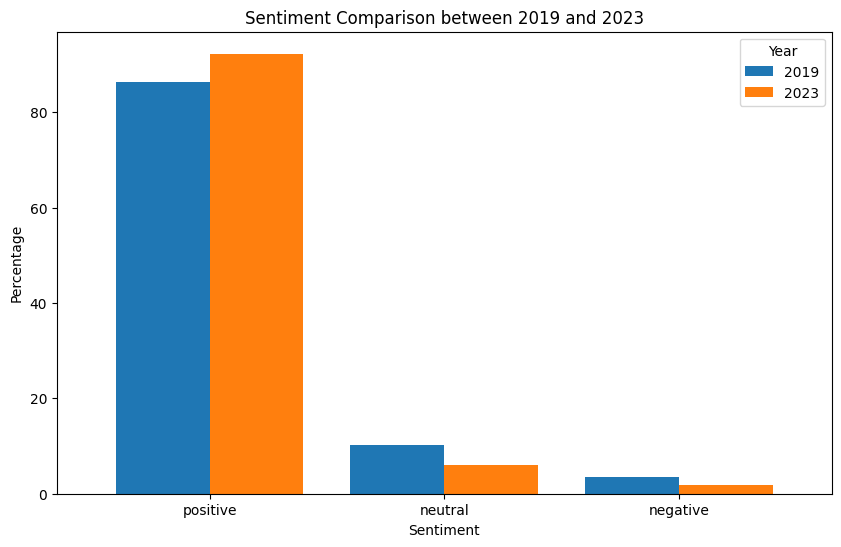

In [21]:
import matplotlib.pyplot as plt

sentiment_comparison = pd.DataFrame({
    '2019': df_2019_sentiment_percentage,
    '2023': df_2023_sentiment_percentage
}).fillna(0)  # Fill NaN values with 0

# Plot the sentiment comparison
sentiment_comparison.plot(kind='bar', figsize=(10, 6), width=0.8)
plt.title('Sentiment Comparison between 2019 and 2023')
plt.xlabel('Sentiment')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.legend(title='Year')
plt.show()

From the above histogram, it is clear that there is a tendency for positive to increase over the years, while neutral and negative revies are decreasing.

We now move to the bonus exercise, for each review, we need to find the corresponding listing from the dataset used in assignment 1.
To do that, we will load the whole dataset, get the unique ids, and from the 'listing_id' column of our current dataset we will find the house that corresponds to it.
Then, based on the listing, we will create a new column to our current dataset for neighborhood.
We will use neighbourhood_cleansed columnh of the original dataset.

In [22]:
# Define the path to the listings CSV files
listings_files = [
    '/kaggle/input/dataset-tede/data/2019/april/listings.csv',
    '/kaggle/input/dataset-tede/data/2019/febrouary/listings.csv',
    '/kaggle/input/dataset-tede/data/2019/march/listings.csv',
    '/kaggle/input/dataset-tede/data/2023/june/listings.csv',
    '/kaggle/input/dataset-tede/data/2023/march/listings.csv',
    '/kaggle/input/dataset-tede/data/2023/september/listings.csv'
]

# Initialize an empty DataFrame to store the concatenated listings
listings_df = pd.DataFrame()

for file in listings_files: #Concatenate the listings CSV files
    df = pd.read_csv(file, usecols=['id', 'neighbourhood_cleansed'])
    listings_df = pd.concat([listings_df, df], ignore_index=True)
    
listings_df = listings_df.drop_duplicates(subset='id')  # Drop duplicates
listing_to_neighborhood = pd.Series(listings_df.neighbourhood_cleansed.values, index=listings_df.id).to_dict()      # Create a dictionary mapping listing_id to neighborhood

#Function to map a listing_id to its neighborhood
def map_neighborhood(listing_id):
    return listing_to_neighborhood.get(listing_id, 'Unknown')


In [23]:
df_2019_annotated.loc[:, 'neighborhood'] = df_2019_annotated['listing_id'].apply(map_neighborhood)  # Add to the 2019 the neighborhood column
df_2023_annotated.loc[:, 'neighborhood'] = df_2023_annotated['listing_id'].apply(map_neighborhood)  # Add to the 2023 the neighborhood column

In [24]:
df_2019_annotated.head(20)

,comments,listing_id,sentiment,neighborhood
0,apartment wonderful fully equiped beautiful de...,10595,positive,ΑΜΠΕΛΟΚΗΠΟΙ
1,emmanouil excellent host provided us everythin...,10595,positive,ΑΜΠΕΛΟΚΗΠΟΙ
2,manos good host kind helpful apartments spacio...,10595,positive,ΑΜΠΕΛΟΚΗΠΟΙ
3,stay emmanouil home comfortable quite perfect ...,10595,positive,ΑΜΠΕΛΟΚΗΠΟΙ
4,fantastic accommodation well located visit ath...,10595,positive,ΑΜΠΕΛΟΚΗΠΟΙ
5,manos gracious host made sure arrived airport ...,10595,positive,ΑΜΠΕΛΟΚΗΠΟΙ
6,manos amazing host start polite arrived late n...,10595,positive,ΑΜΠΕΛΟΚΗΠΟΙ
8,apartment exactly described comfortable clean ...,10595,positive,ΑΜΠΕΛΟΚΗΠΟΙ
9,great apartment owner 6 people stayed 3bedroom...,10595,positive,ΑΜΠΕΛΟΚΗΠΟΙ
10,apartment nice clean owner helpful help 247 am...,10595,positive,ΑΜΠΕΛΟΚΗΠΟΙ


In [25]:
df_2023_annotated.tail(20)

,comments,listing_id,sentiment,neighborhood
9898,absolutely lovely giannis familyfriends awesom...,6145084,positive,ΑΚΡΟΠΟΛΗ
9899,giannis warm welcoming person felt comfortable...,6145084,positive,ΑΚΡΟΠΟΛΗ
9900,historic centre perfect location surrounded gr...,6145084,positive,ΑΚΡΟΠΟΛΗ
9901,nice thank,6145084,positive,ΑΚΡΟΠΟΛΗ
9902,giannis son orestis great hosts dealt mostly o...,6145084,positive,ΑΚΡΟΠΟΛΗ
9903,gianniss place clean easy access attractive pl...,6145084,positive,ΑΚΡΟΠΟΛΗ
9904,kindness comfort compassion,6145084,positive,ΑΚΡΟΠΟΛΗ
9905,enjoyed stay giannis house lot house garden be...,6145084,positive,ΑΚΡΟΠΟΛΗ
9906,outstanding host would highly recommend home l...,6145084,positive,ΑΚΡΟΠΟΛΗ
9907,easily one best airbnbs i’ve stayed host locat...,6145084,positive,ΑΚΡΟΠΟΛΗ


We will use the common neighborhoods between the two dataset to study the sentiment changes over time.

In [26]:
# Identify common neighborhoods between df_2019 and df_2023
common_neighborhoods = list(set(df_2019_annotated['neighborhood']).intersection(set(df_2023_annotated['neighborhood'])))


Define a function to calculate sentiment percentages per neighborhood. Filter the DataFrames to include only common neighborhoods, and then calculate the sentiment percentages per neighborhood for each DataFrame.

In [27]:
# Function to calculate sentiment percentages per neighborhood
def calculate_sentiment_percentage_per_neighborhood(df):
    sentiment_counts = df.groupby(['neighborhood', 'sentiment']).size().unstack(fill_value=0)   # Group by neighborhood and sentiment
    sentiment_percentages = sentiment_counts.div(sentiment_counts.sum(axis=1), axis=0) * 100    # Normalize the counts to get percentages
    return sentiment_percentages

# Filter DataFrames to only include common neighborhoods
df_2019_common = df_2019_annotated[df_2019_annotated['neighborhood'].isin(common_neighborhoods)]    # Filter the 2019 DataFrame
df_2023_common = df_2023_annotated[df_2023_annotated['neighborhood'].isin(common_neighborhoods)]

# Calculate sentiment percentages per neighborhood for each DataFrame
df_2019_sentiment_per_neighborhood = calculate_sentiment_percentage_per_neighborhood(df_2019_common) # Calculate the sentiment percentages per neighborhood for 2019
df_2023_sentiment_per_neighborhood = calculate_sentiment_percentage_per_neighborhood(df_2023_common)


Define a function to plot sentiment comparison per neighborhood between the 2019 and 2023 datasets. Combine the sentiment percentages into a single DataFrame for comparison, and then plot the sentiment comparison for each neighborhood, displaying the sentiment distribution for common neighborhoods.

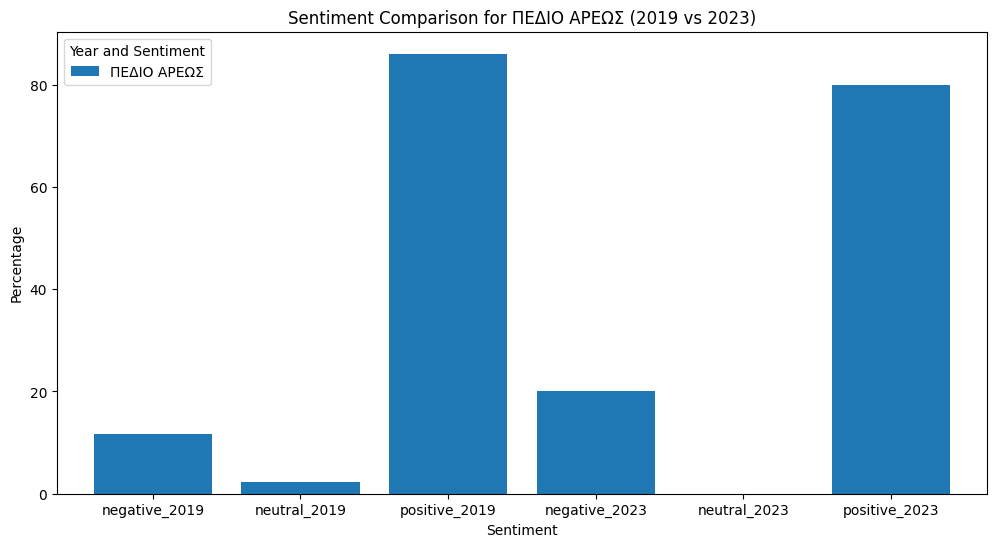

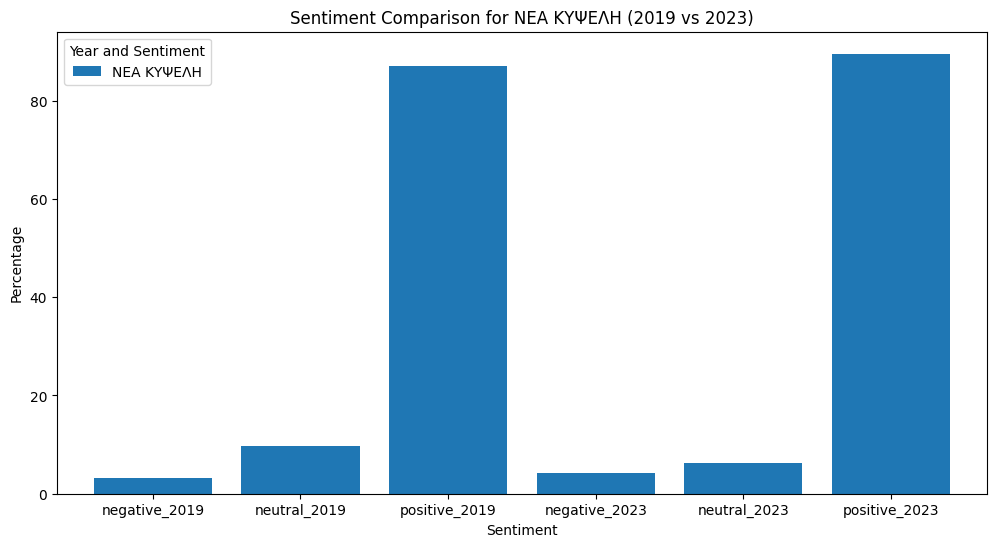

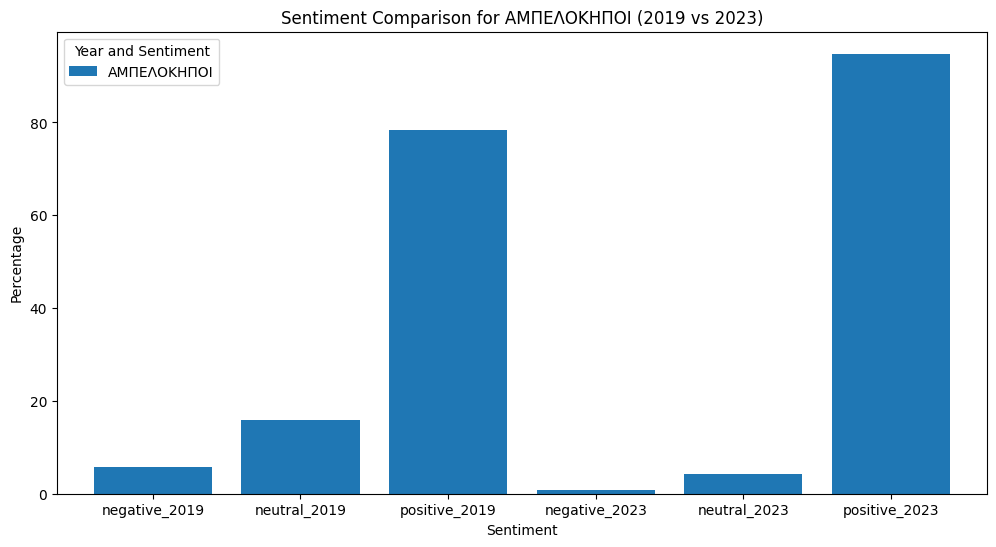

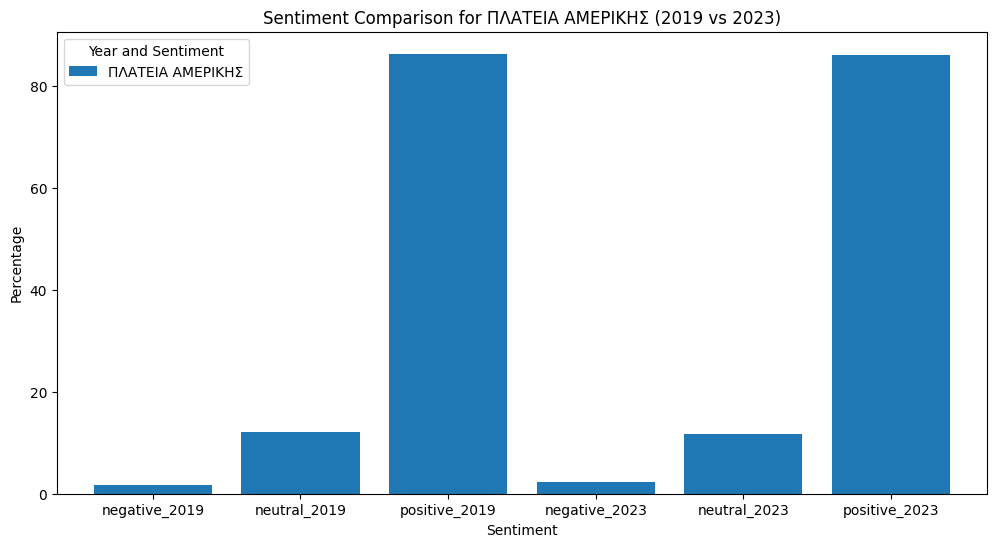

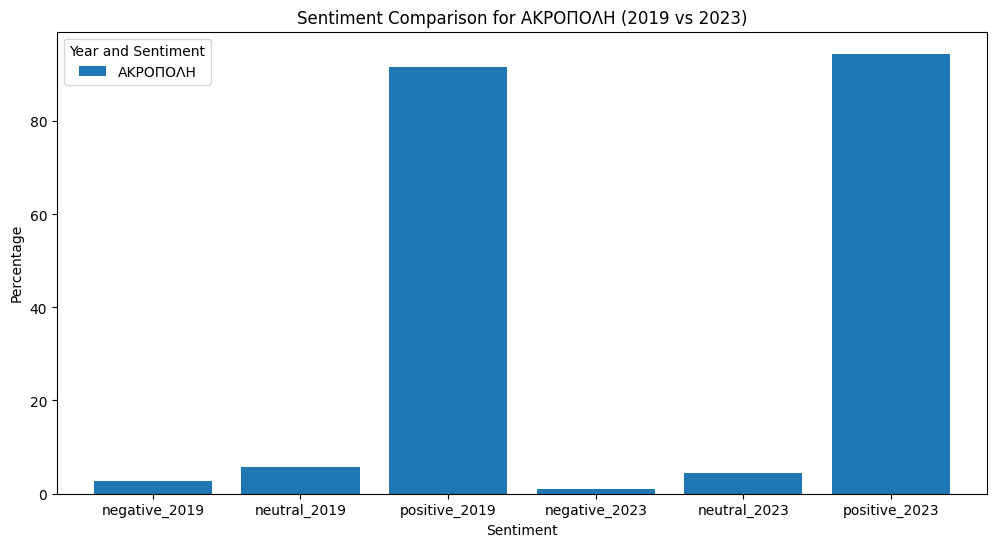

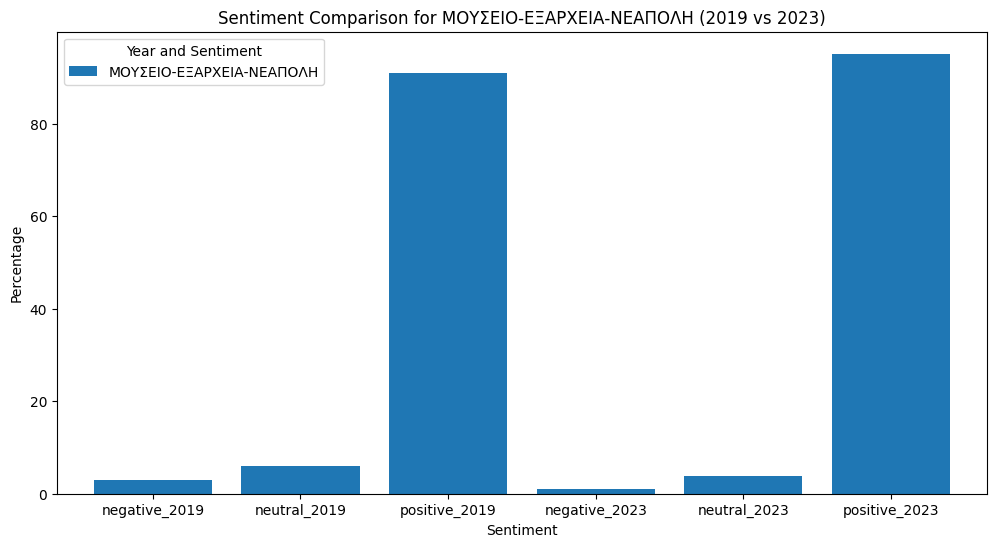

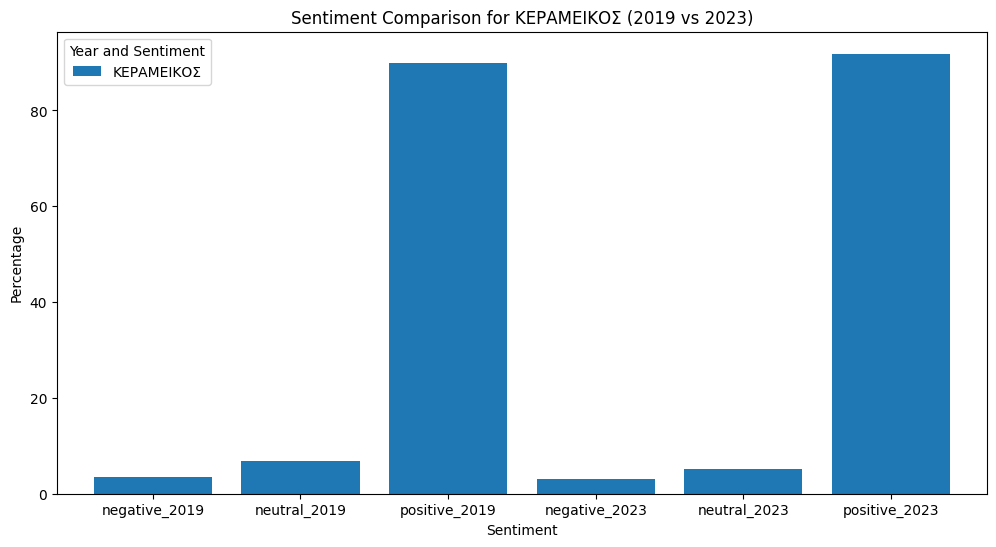

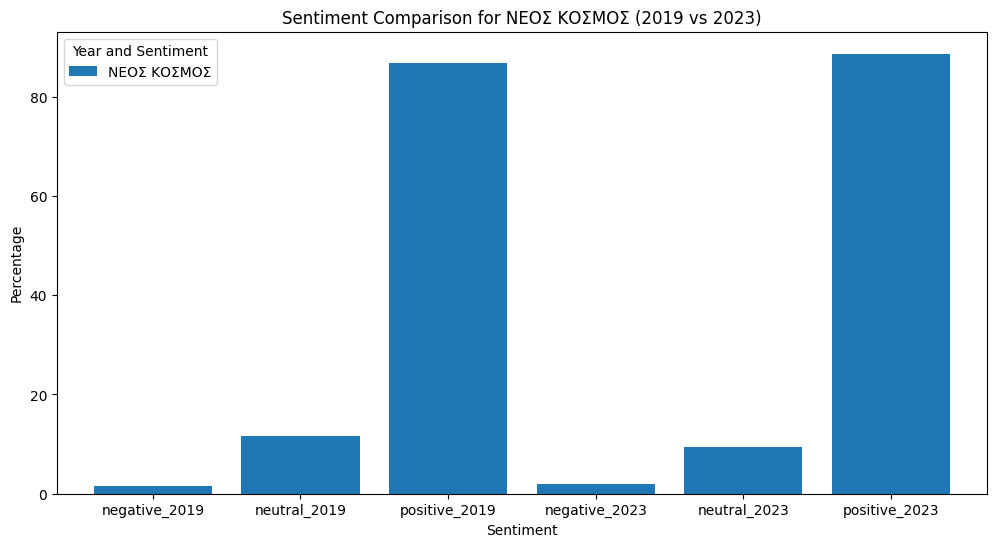

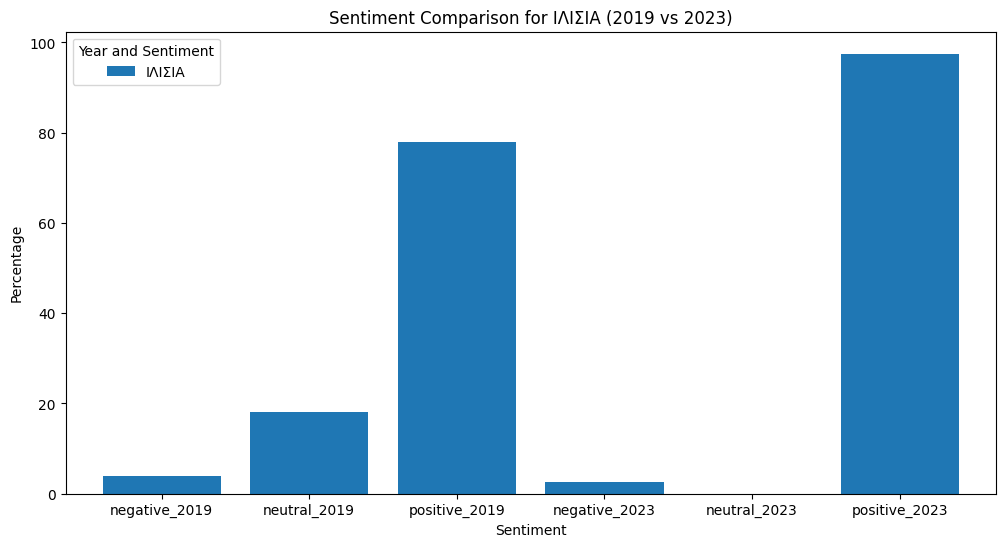

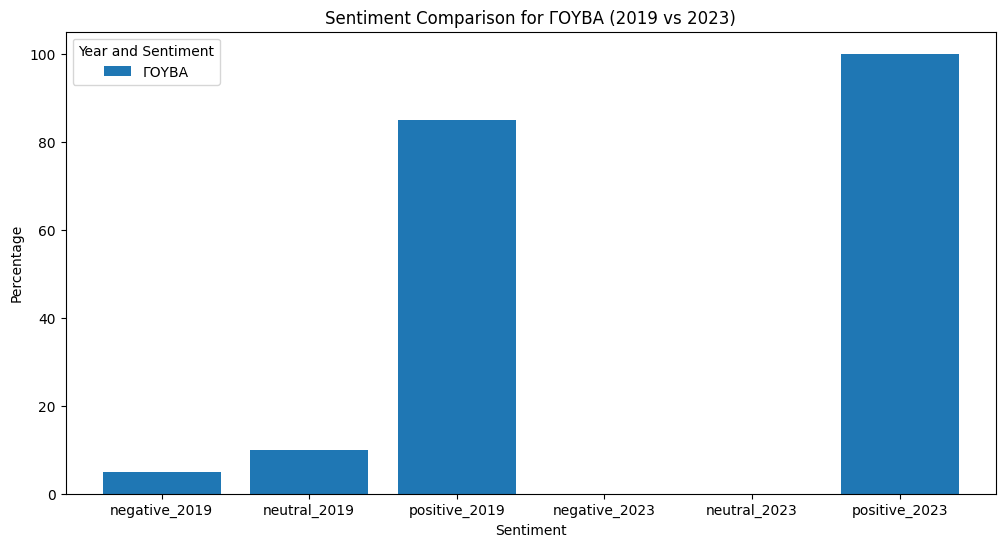

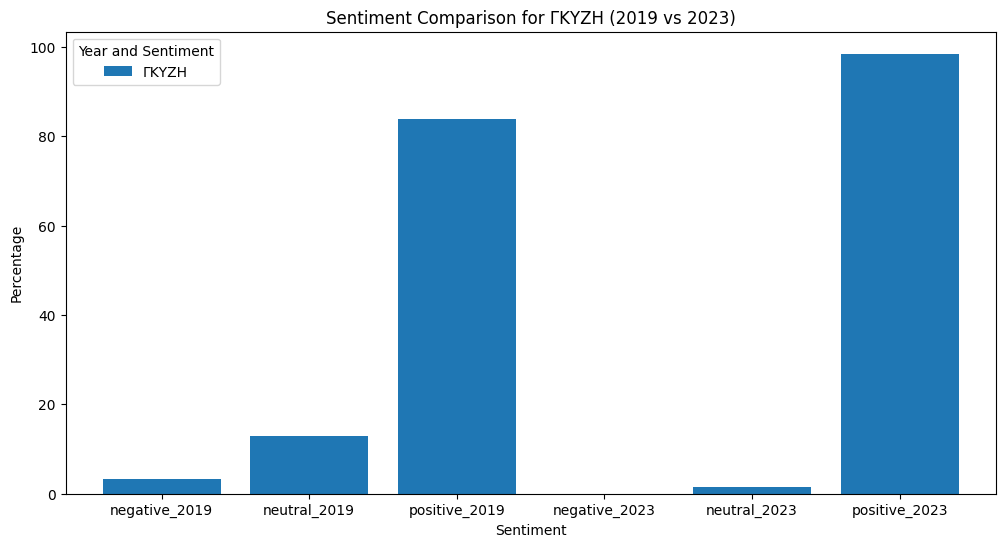

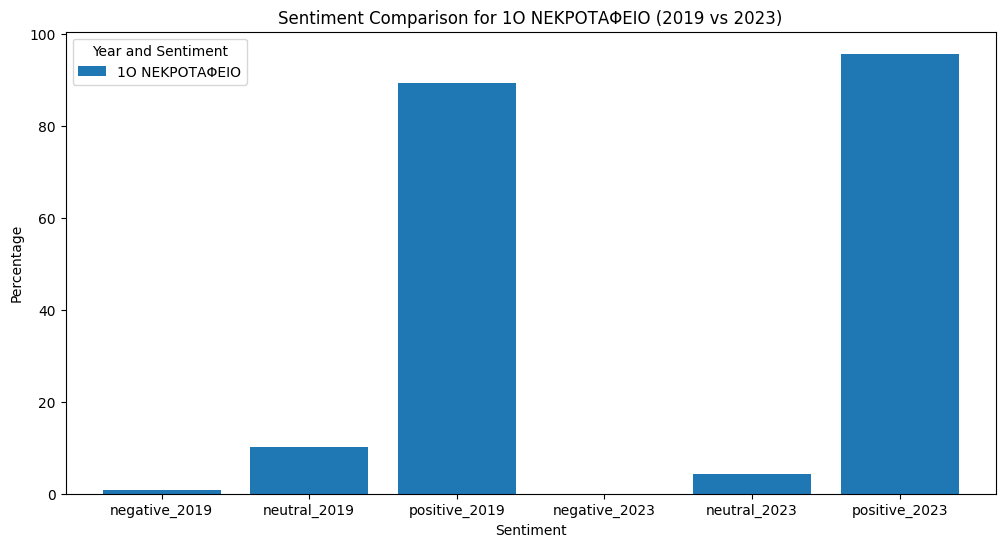

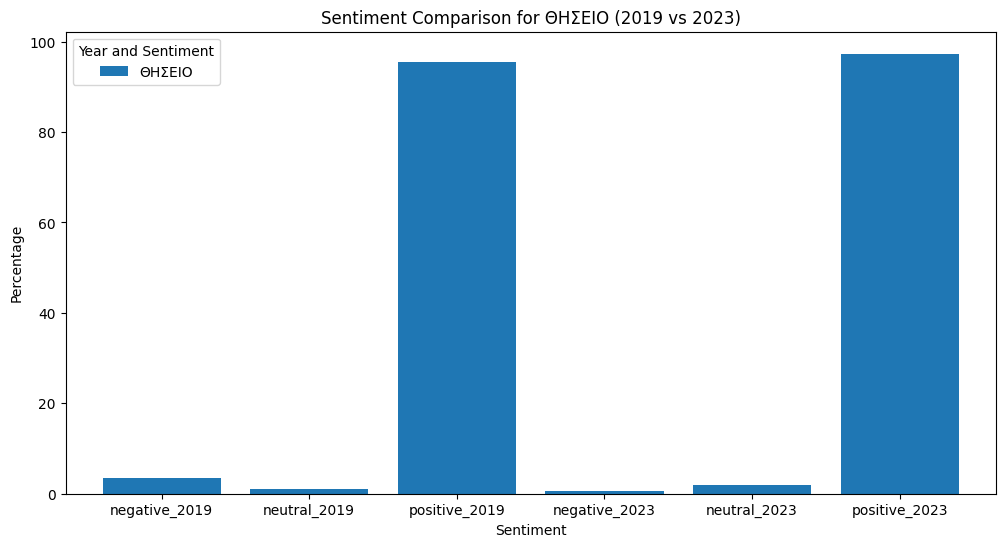

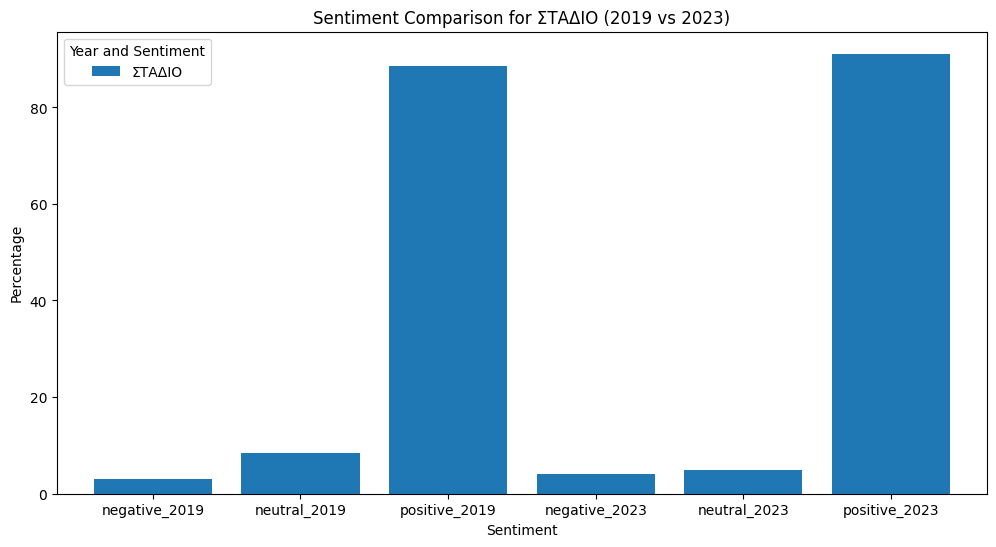

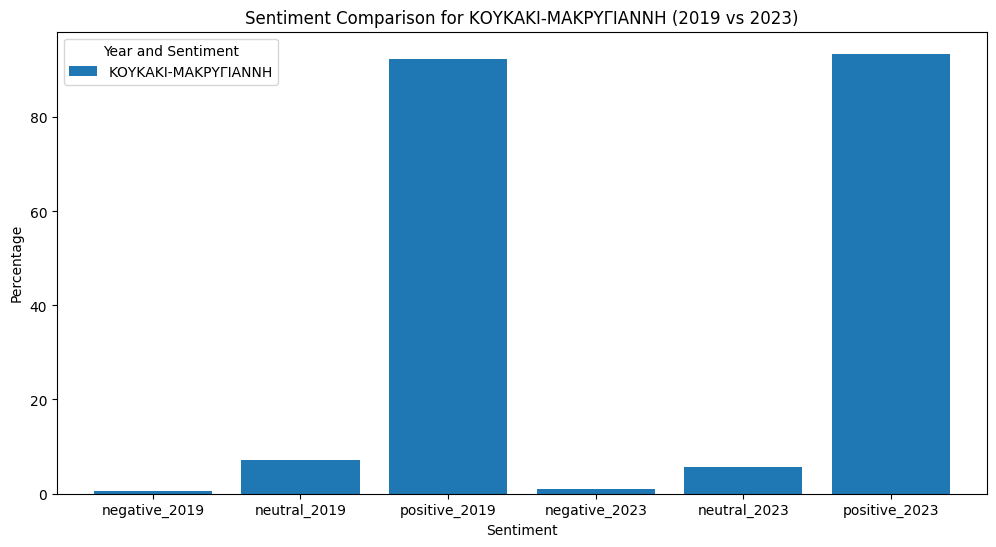

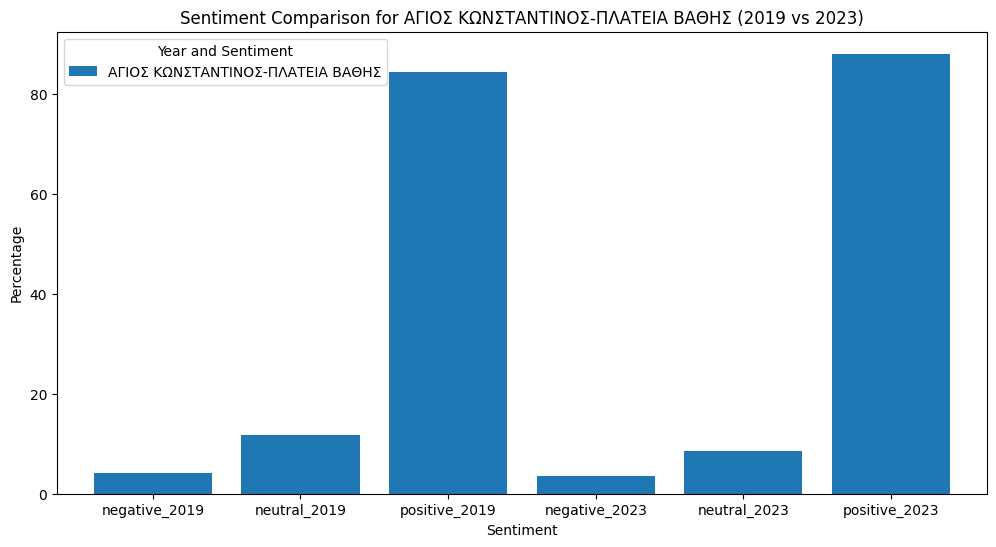

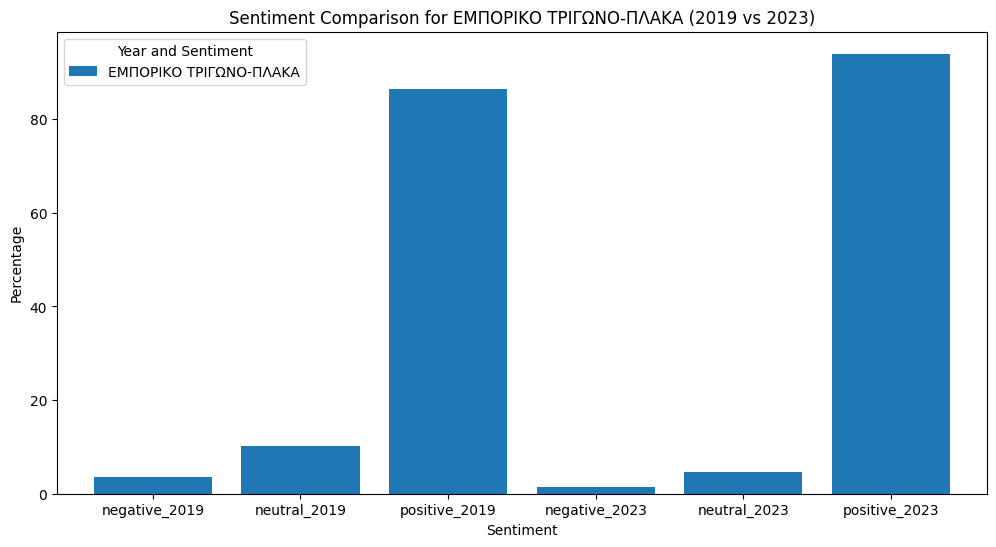

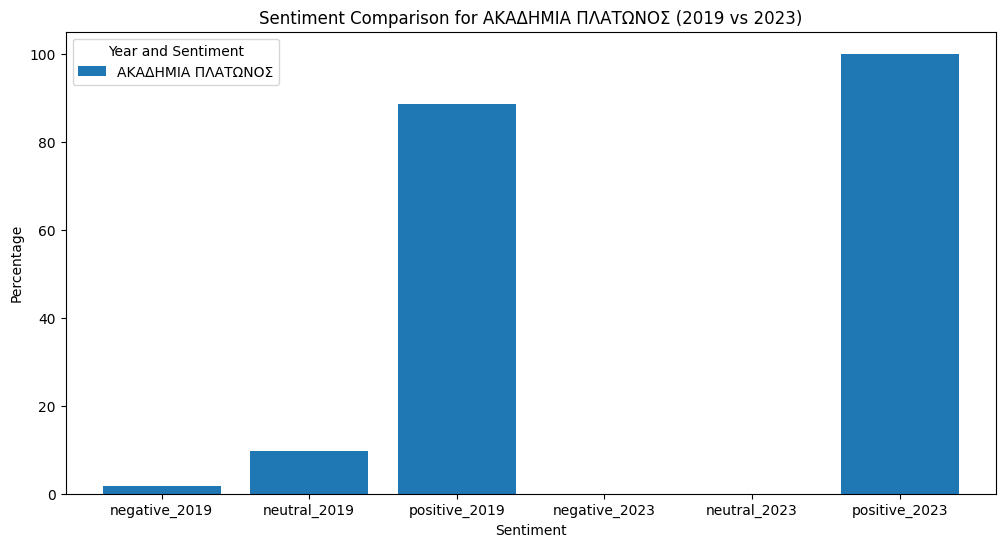

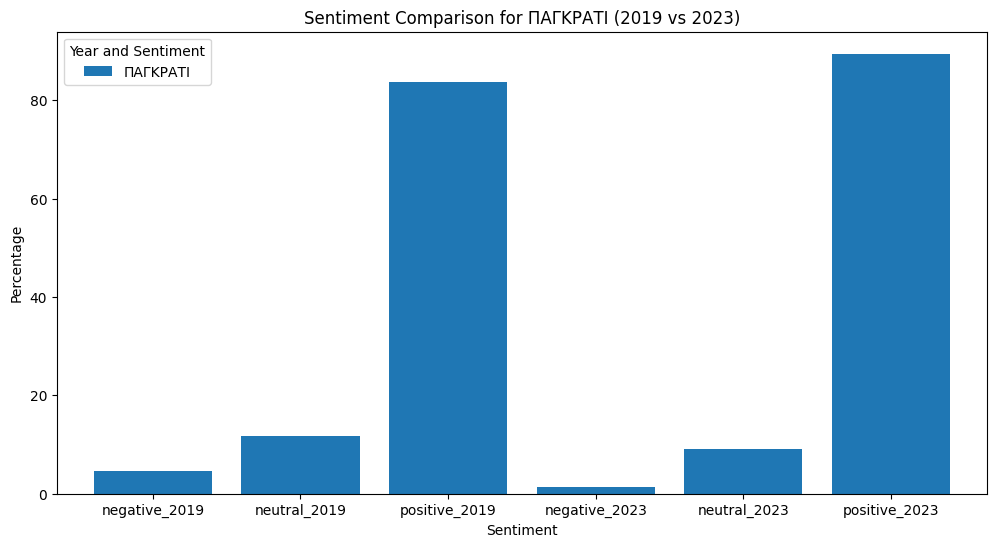

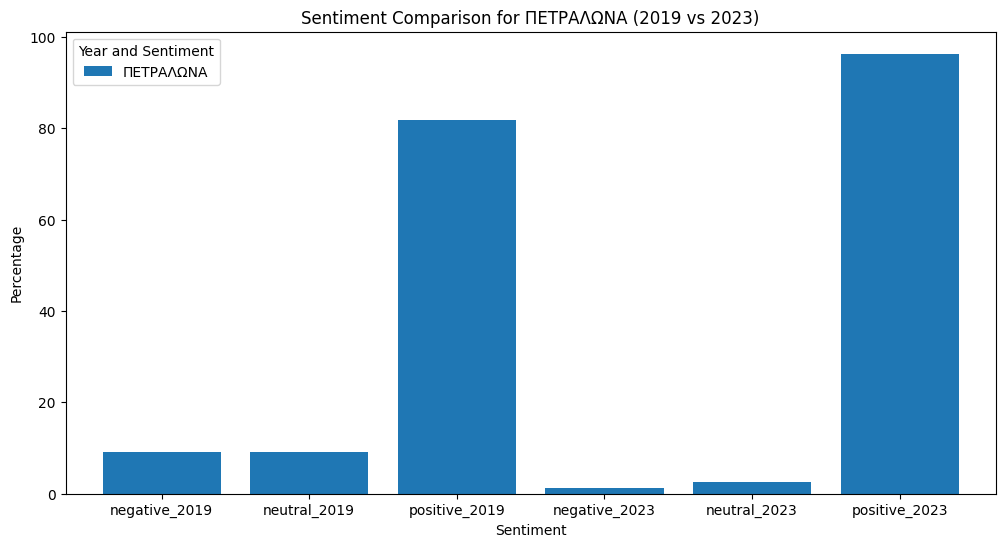

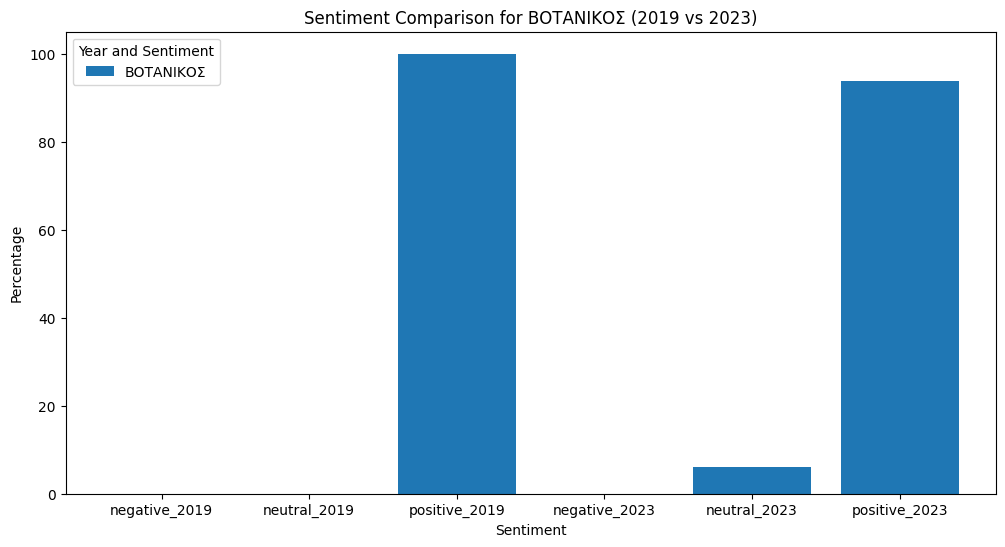

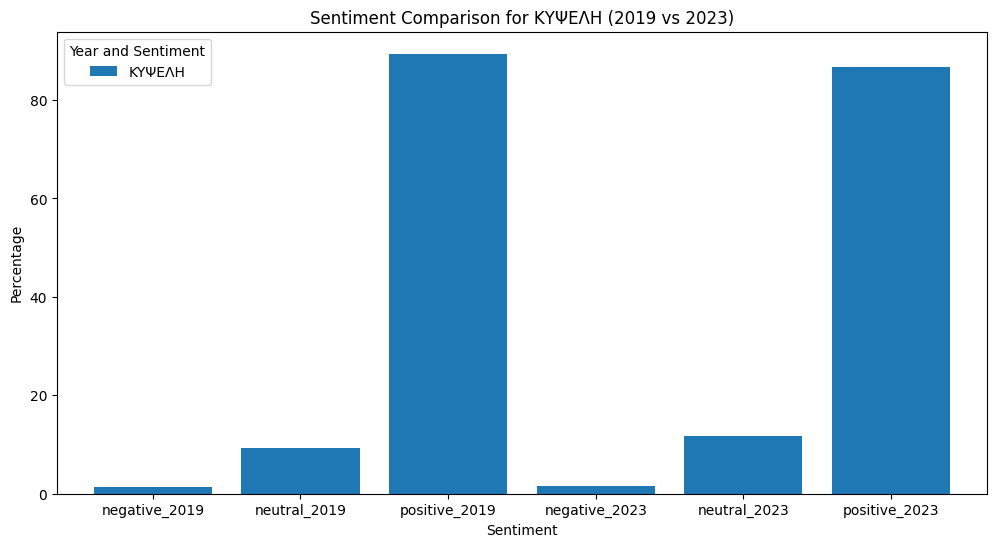

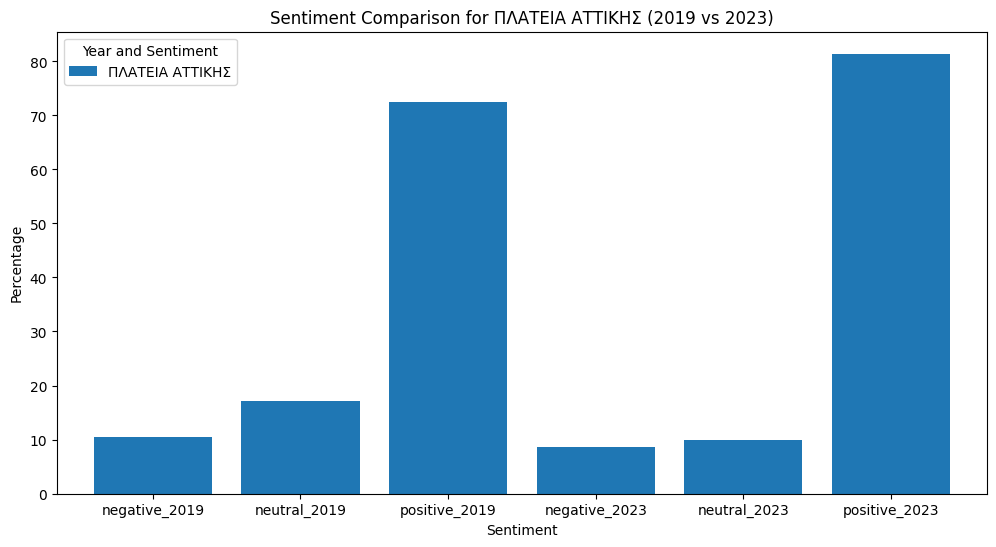

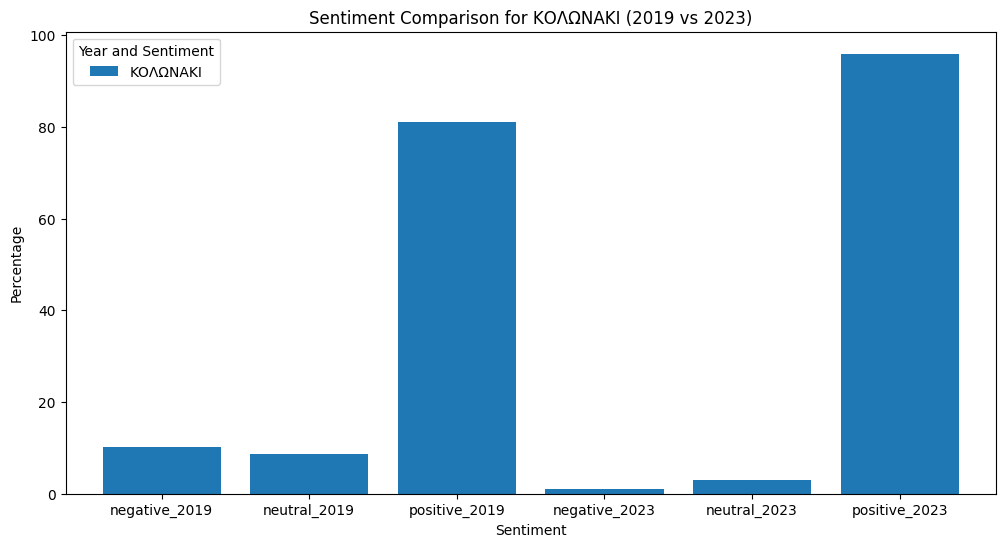

In [28]:
def plot_sentiment_comparison_per_neighborhood(df_2019, df_2023, neighborhoods):
    # Combine the sentiment percentages into a single DataFrame for comparison
    sentiment_comparison = pd.concat(
        [df_2019.loc[df_2019.index.intersection(neighborhoods)].add_suffix('_2019'),
         df_2023.loc[df_2023.index.intersection(neighborhoods)].add_suffix('_2023')],
        axis=1,
        sort=False
    ).fillna(0)  # Fill NaN values with 0

    # Plot the sentiment comparison for each neighborhood
    for neighborhood in neighborhoods:
        sentiment_data = sentiment_comparison.loc[neighborhood]
        sentiment_data.plot(kind='bar', figsize=(12, 6), width=0.8)
        plt.title(f'Sentiment Comparison for {neighborhood} (2019 vs 2023)')
        plt.xlabel('Sentiment')
        plt.ylabel('Percentage')
        plt.xticks(rotation=0)
        plt.legend(title='Year and Sentiment')
        plt.show()

# Plot sentiment distribution for common neighborhoods
plot_sentiment_comparison_per_neighborhood(df_2019_sentiment_per_neighborhood, df_2023_sentiment_per_neighborhood, common_neighborhoods)


We now proceed to the Sentiment analysis.

First use train_test_split from sklearn to split int train and test set.

In [29]:
from sklearn.model_selection import train_test_split
df_combined = pd.concat([df_2019_annotated, df_2023_annotated], ignore_index=True)      # Concatenate the 2019 and 2023 DataFrames
train_df, test_df = train_test_split(df_combined, test_size=0.2, random_state=1)    # Split the data into training and test sets
train_df.to_csv('train.tsv', sep='\t', index=False)   # Save the training set to a TSV file
test_df.to_csv('test.tsv', sep='\t', index=False)   # Save the test set to a TSV file

# Display the first few rows of the training and test sets
print("Training Set:")
train_df.head()



Training Set:


,comments,listing_id,sentiment,neighborhood
7369,nice cozy place lots facilities kind hosts bed...,10993,positive,ΑΜΠΕΛΟΚΗΠΟΙ
2243,listing accurate host welcomed us entrance app...,139877,positive,ΙΛΙΣΙΑ
8748,check easy lots great cafes shops bakery v nea...,401423,positive,ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ
7503,fantastic spot main square varnavas plenty nig...,2219385,positive,ΣΤΑΔΙΟ
13981,stay meet host vassilis super fun guy really c...,7672433,positive,ΝΕΟΣ ΚΟΣΜΟΣ


In [30]:
print("\nTest Set:")
test_df.head()


Test Set:


,comments,listing_id,sentiment,neighborhood
9754,family loved apartment much comfortable spacio...,2820880,positive,ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ
3963,really nice stay nice flat near metro central ...,317049,positive,ΑΜΠΕΛΟΚΗΠΟΙ
14513,great quiet spot within short walk acropolis e...,4939649,positive,ΝΕΟΣ ΚΟΣΜΟΣ
1522,easy find well furnished comfortable happy,79423,positive,ΚΥΨΕΛΗ
1936,nice cozy place center athens,81230,positive,ΠΛΑΤΕΙΑ ΑΜΕΡΙΚΗΣ


Load the training dataset, compute TF-IDF vectors for the comments, and save both the TF-IDF vectors and the TF-IDF vectorizer to .pkl files.

In [31]:
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer

train_df = pd.read_csv('train.tsv', sep='\t')

# Compute TF-IDF vectors
tfidf_vectorizer = TfidfVectorizer()    # Initialize the TF-IDF vectorizer
tfidf_vectors = tfidf_vectorizer.fit_transform(train_df['comments'])    # Fit and transform the comments to TF-IDF vectors

# Save the TF-IDF vectors to a .pkl file
with open('tfidf_vectors.pkl', 'wb') as f:
    pickle.dump(tfidf_vectors, f)

# Save the TF-IDF vectorizer to a .pkl file
with open('tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(tfidf_vectorizer, f)

Load the pre-trained Word2Vec model provided by google, generate average word embeddings for the training data comments, and save the resulting embeddings to a .pkl file.

In [32]:
import gensim
import numpy as np

# Load the pre-trained Word2Vec model
word2vec_model_path = '/kaggle/input/word2vec-zipped/GoogleNews-vectors-negative300.bin'    # Path to the pre-trained Word2Vec model
word2vec = gensim.models.KeyedVectors.load_word2vec_format(word2vec_model_path, binary=True)    # Load the Word2Vec model

# Generate word embeddings for the training data
def get_average_word2vec_embeddings(comments, model, embedding_dim=300):
    embeddings = []   # Initialize an empty list to store the embeddings
    for comment in comments:
        words = comment.split()
        word_embeddings = [model[word] for word in words if word in model]
        if word_embeddings:
            avg_embedding = np.mean(word_embeddings, axis=0)
        else:
            avg_embedding = np.zeros(embedding_dim)
        embeddings.append(avg_embedding)
    return np.array(embeddings)

embedding_dim = 300   # Define the dimension of the word embeddings
word2vec_embeddings = get_average_word2vec_embeddings(train_df['comments'], word2vec, embedding_dim)

# Save the word embeddings to a .pkl file
with open('word2vec_embeddings.pkl', 'wb') as f:
    pickle.dump(word2vec_embeddings, f)


In [33]:
train_df = pd.read_csv('train.tsv', sep='\t')
test_df = pd.read_csv('test.tsv', sep='\t')

In [34]:
with open('tfidf_vectors.pkl', 'rb') as f:
    tfidf_vectors = pickle.load(f)


In [35]:
with open('tfidf_vectorizer.pkl', 'rb') as f:
    tfidf_vectorizer = pickle.load(f)

In [36]:
with open('word2vec_embeddings.pkl', 'rb') as f:
    word2vec_embeddings = pickle.load(f)

# Generate TF-IDF vectors for the test set
tfidf_test_vectors = tfidf_vectorizer.transform(test_df['comments'])

Load the training and test data, as well as precomputed TF-IDF vectors and Word2Vec embeddings. Generate TF-IDF vectors and Word2Vec embeddings for the test set comments.

In [37]:
import pandas as pd
import pickle

# Load the training and test data
train_df = pd.read_csv('train.tsv', sep='\t')
test_df = pd.read_csv('test.tsv', sep='\t')

# Load the TF-IDF vectors
with open('tfidf_vectors.pkl', 'rb') as f:
    tfidf_vectors = pickle.load(f)

with open('tfidf_vectorizer.pkl', 'rb') as f:
    tfidf_vectorizer = pickle.load(f)

# Load the Word2Vec embeddings
with open('word2vec_embeddings.pkl', 'rb') as f:
    word2vec_embeddings = pickle.load(f)

# Generate TF-IDF vectors for the test set
tfidf_test_vectors = tfidf_vectorizer.transform(test_df['comments'])

# Generate Word2Vec embeddings for the test set
#We will use mean word embeddings for comments
def get_average_word2vec_embeddings(comments, model, embedding_dim=300):
    embeddings = []
    for comment in comments:
        words = comment.split() # Split the comment into words
        word_embeddings = [model[word] for word in words if word in model]  # Get the word embeddings for words in the model's vocabulary
        if word_embeddings: # If there are word embeddings
            avg_embedding = np.mean(word_embeddings, axis=0)    # Calculate the average embedding for the comment
        else:
            avg_embedding = np.zeros(embedding_dim)   # If no word embeddings are found, use a zero vector
        embeddings.append(avg_embedding)    # Append the average embedding to the list
    return np.array(embeddings)

word2vec_test_embeddings = get_average_word2vec_embeddings(test_df['comments'], word2vec, 300)  # Generate Word2Vec embeddings for the test set


Define functions to the different models and print their performance metrics. Evaluate SVM, Random Forest, and KNN classifiers using both TF-IDF vectors and Word2Vec embeddings, and print the precision, recall, F1-score, accuracy, and elapsed time for each model and representation. Sklearn libray is used for all the above. 

Perform 10-fold cross-validation on the training data and then evaluate the trained models on the test dataset

In [38]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_recall_fscore_support, accuracy_score
from sklearn.model_selection import cross_val_predict
import time

def evaluate_model_cv(model, X, y):    # Function to evaluate a model using cross-validation
    start_time = time.time()        # Get the start time
    predictions = cross_val_predict(model, X, y, cv=10)     # Perform cross-validation with 10 folds
    end_time = time.time()
    precision, recall, f1, _ = precision_recall_fscore_support(y, predictions, average='weighted')  # Calculate precision, recall, and F1-score
    accuracy = accuracy_score(y, predictions)   # Calculate accuracy
    elapsed_time = end_time - start_time    # Calculate the elapsed time
    return precision, recall, f1, accuracy, elapsed_time 

def evaluate_model_test(model, X_train, y_train, X_test, y_test):    # Function to evaluate a model on the test set
    start_time = time.time()        # Get the start time
    model.fit(X_train, y_train)     # Train the model on the training data
    predictions = model.predict(X_test)  # Predict on the test data
    end_time = time.time()
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, predictions, average='weighted')  # Calculate precision, recall, and F1-score
    accuracy = accuracy_score(y_test, predictions)   # Calculate accuracy
    elapsed_time = end_time - start_time    # Calculate the elapsed time
    return precision, recall, f1, accuracy, elapsed_time 

def print_metrics(name, precision, recall, f1, accuracy, elapsed_time):
    # Function to print the evaluation metrics
    print(f"{name} - Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}, Accuracy: {accuracy:.4f} (Time: {elapsed_time:.2f}s)")

# Extract the labels from the test data
y_test = test_df['sentiment']

# Evaluate SVM
svm_model = svm.SVC(kernel='linear')    # Initialize the SVM model as a linear SVM

# Cross-validation on training data
precision, recall, f1, accuracy, elapsed_time = evaluate_model_cv(svm_model, tfidf_vectors, train_df['sentiment'])
print_metrics("SVM (TF-IDF CV)", precision, recall, f1, accuracy, elapsed_time)

precision, recall, f1, accuracy, elapsed_time = evaluate_model_cv(svm_model, word2vec_embeddings, train_df['sentiment'])
print_metrics("SVM (Word2Vec CV)", precision, recall, f1, accuracy, elapsed_time)

# Final evaluation on test data
precision, recall, f1, accuracy, elapsed_time = evaluate_model_test(svm_model, tfidf_vectors, train_df['sentiment'], tfidf_test_vectors, y_test)
print_metrics("SVM (TF-IDF Test)", precision, recall, f1, accuracy, elapsed_time)

precision, recall, f1, accuracy, elapsed_time = evaluate_model_test(svm_model, word2vec_embeddings, train_df['sentiment'], word2vec_test_embeddings, y_test)
print_metrics("SVM (Word2Vec Test)", precision, recall, f1, accuracy, elapsed_time)

# Evaluate Random Forest
rf_model = RandomForestClassifier()   # Initialize the Random Forest model

# Cross-validation on training data
precision, recall, f1, accuracy, elapsed_time = evaluate_model_cv(rf_model, tfidf_vectors, train_df['sentiment'])
print_metrics("Random Forest (TF-IDF CV)", precision, recall, f1, accuracy, elapsed_time)

precision, recall, f1, accuracy, elapsed_time = evaluate_model_cv(rf_model, word2vec_embeddings, train_df['sentiment'])
print_metrics("Random Forest (Word2Vec CV)", precision, recall, f1, accuracy, elapsed_time)

# Final evaluation on test data
precision, recall, f1, accuracy, elapsed_time = evaluate_model_test(rf_model, tfidf_vectors, train_df['sentiment'], tfidf_test_vectors, y_test)
print_metrics("Random Forest (TF-IDF Test)", precision, recall, f1, accuracy, elapsed_time)

precision, recall, f1, accuracy, elapsed_time = evaluate_model_test(rf_model, word2vec_embeddings, train_df['sentiment'], word2vec_test_embeddings, y_test)
print_metrics("Random Forest (Word2Vec Test)", precision, recall, f1, accuracy, elapsed_time)

# Evaluate KNN
knn_model = KNeighborsClassifier()

# Cross-validation on training data
precision, recall, f1, accuracy, elapsed_time = evaluate_model_cv(knn_model, tfidf_vectors, train_df['sentiment'])
print_metrics("KNN (TF-IDF CV)", precision, recall, f1, accuracy, elapsed_time)

precision, recall, f1, accuracy, elapsed_time = evaluate_model_cv(knn_model, word2vec_embeddings, train_df['sentiment'])
print_metrics("KNN (Word2Vec CV)", precision, recall, f1, accuracy, elapsed_time)

# Final evaluation on test data
precision, recall, f1, accuracy, elapsed_time = evaluate_model_test(knn_model, tfidf_vectors, train_df['sentiment'], tfidf_test_vectors, y_test)
print_metrics("KNN (TF-IDF Test)", precision, recall, f1, accuracy, elapsed_time)

precision, recall, f1, accuracy, elapsed_time = evaluate_model_test(knn_model, word2vec_embeddings, train_df['sentiment'], word2vec_test_embeddings, y_test)
print_metrics("KNN (Word2Vec Test)", precision, recall, f1, accuracy, elapsed_time)


SVM (TF-IDF CV) - Precision: 0.9031, Recall: 0.9158, F1-Score: 0.8944, Accuracy: 0.9158 (Time: 104.34s)
SVM (Word2Vec CV) - Precision: 0.9046, Recall: 0.9143, F1-Score: 0.8892, Accuracy: 0.9143 (Time: 41.02s)
SVM (TF-IDF Test) - Precision: 0.9093, Recall: 0.9205, F1-Score: 0.9025, Accuracy: 0.9205 (Time: 13.78s)
SVM (Word2Vec Test) - Precision: 0.8951, Recall: 0.9120, F1-Score: 0.8871, Accuracy: 0.9120 (Time: 5.68s)
Random Forest (TF-IDF CV) - Precision: 0.9092, Recall: 0.8989, F1-Score: 0.8559, Accuracy: 0.8989 (Time: 174.39s)
Random Forest (Word2Vec CV) - Precision: 0.8867, Recall: 0.9032, F1-Score: 0.8685, Accuracy: 0.9032 (Time: 218.35s)
Random Forest (TF-IDF Test) - Precision: 0.8897, Recall: 0.9000, F1-Score: 0.8579, Accuracy: 0.9000 (Time: 8.99s)
Random Forest (Word2Vec Test) - Precision: 0.8823, Recall: 0.9031, F1-Score: 0.8656, Accuracy: 0.9031 (Time: 27.46s)
KNN (TF-IDF CV) - Precision: 0.8602, Recall: 0.8985, F1-Score: 0.8618, Accuracy: 0.8985 (Time: 54.37s)
KNN (Word2Vec CV

Proceed with the third exercise.

Define calculate_similarity using cosine_similarity from sklearn

In [39]:
from sklearn.metrics.pairwise import cosine_similarity
def calculate_similarity(embedding1, embedding2):
    # Function to calculate the cosine similarity between two embeddings
    #Inputs: embedding1, embedding2 (numpy arrays)
    #Output: similarity (float)
    embedding1 = embedding1.reshape(1, -1)
    embedding2 = embedding2.reshape(1, -1)
    similarity = cosine_similarity(embedding1, embedding2)  # Calculate the cosine similarity
    return similarity[0][0] # Return the similarity value, it is [0][0] because cosine_similarity returns a 2D array


Create some random embeddings to check our function

In [40]:
import random

def get_random_embeddings_and_comments(df, embeddings, num_samples=2):  # Function to get random embeddings and their corresponding comments
    indices = random.sample(range(len(df)), num_samples)    # Get random indices
    selected_embeddings = [embeddings[i] for i in indices]  # Get the embeddings for the selected indices
    selected_comments = [df.iloc[i]['comments'] for i in indices]   # Get the comments for the selected indices
    return selected_embeddings, selected_comments

# Get two random embeddings and their corresponding comments
random_embeddings, random_comments = get_random_embeddings_and_comments(train_df, word2vec_embeddings)

similarity = calculate_similarity(random_embeddings[0], random_embeddings[1])   # Calculate the similarity between the two embeddings

# Print the results
print(f"Comment 1: {random_comments[0]}")
print(f"Embedding 1: {random_embeddings[0][:10]}...")  # Print the first 10 values for brevity

print(f"Comment 2: {random_comments[1]}")
print(f"Embedding 2: {random_embeddings[1][:10]}...")  # Print the first 10 values for brevity

print(f"Cosine Similarity: {similarity:.4f}")

Comment 1: excellent communication spiros uncomplicated pleasant comfort apartment fulfilled expectations recommend thank much spiros
Embedding 1: [-0.04863531 -0.03402016 -0.03422408  0.09851074 -0.02773216  0.04592063
  0.12605979 -0.04487748  0.05865479  0.06477495]...
Comment 2: miglen nice accommodating arrive late nite helpful gave us perfect directions find place room location perfect place clean cosy recommend thanks everything miglen
Embedding 2: [-0.02415619  0.06577758 -0.00192795  0.07281494 -0.08092652 -0.06388855
  0.05377197 -0.05397644 -0.0034256   0.04349594]...
Cosine Similarity: 0.6814


Calculate the 500 most common words, we will create a NxN array to keep track of the cosine similarities of some of the most common words.

In [41]:
from collections import Counter

# Combine all text from the specified column into a single string
all_text = ' '.join(train_df['comments'].tolist())

# Tokenize the string into individual words (removing punctuation and making it lowercase)
words = re.findall(r'\b\w+\b', all_text.lower())

# Count the frequency of each word
word_counts = Counter(words)

# Get the 500 most common words
most_common_words = word_counts.most_common(500)

Print the results

In [42]:
for i in range (10):
    print (most_common_words[i])
common_words=[word[0] for word in most_common_words]
for i in range (10):
    print (common_words[i])

('apartment', 8477)
('great', 6488)
('stay', 5536)
('athens', 5190)
('place', 5185)
('location', 4728)
('us', 4634)
('host', 3295)
('everything', 3179)
('nice', 3032)
apartment
great
stay
athens
place
location
us
host
everything
nice


Filter the words that are not in the word2vec model

In [43]:

word2vec_model_path = '/kaggle/input/word2vec-zipped/GoogleNews-vectors-negative300.bin'
word2vec = gensim.models.KeyedVectors.load_word2vec_format(word2vec_model_path, binary=True)        # Load the Word2Vec model
filtered_common_words = [word for word in common_words if word in word2vec] # Filter out words not in the Word2Vec model
print(len(filtered_common_words))       #Our final list of common words
similarity_matrix = np.identity(len(filtered_common_words)) # Initialize a similarity matrix with the same size as the number of words, use np.identity to set the diagonal to 1
#This is because cosine similarity between a word and itself is 1


for i in range(len(filtered_common_words)):         #Fill in the similarity matrix
    for j in range(i + 1, len(filtered_common_words)):  # Iterate over the upper triangular matrix to avoid duplicate calculations
        embedding1 = word2vec[filtered_common_words[i]] # Get the embedding for the first word
        embedding2 = word2vec[filtered_common_words[j]] # Get the embedding for the second word
        similarity = calculate_similarity(embedding1, embedding2)   # Calculate the cosine similarity between the two embeddings
        similarity_matrix[i][j] = similarity    
        similarity_matrix[j][i] = similarity

# Convert to DataFrame for better readability
similarity_matrix_df = pd.DataFrame(similarity_matrix, index=filtered_common_words, columns=filtered_common_words)

472


In [44]:
similarity_matrix_df.head(10)

,apartment,great,stay,athens,place,location,us,host,everything,nice,...,literally,must,bedrooms,choice,tv,steps,park,streets,spots,due
apartment,1.000000,-0.007632,0.133974,0.100116,0.169352,0.218608,0.011234,-0.050292,0.056804,0.107052,...,0.117011,0.009297,0.460435,0.045216,0.063092,0.071595,0.197431,0.313899,0.083305,0.002641
great,-0.007632,1.000000,0.104186,0.094423,0.120061,0.049335,0.429509,0.133303,0.384613,0.645466,...,0.287490,0.115651,0.035366,0.161116,0.122259,0.073879,0.085801,0.060396,0.067953,0.047203
stay,0.133974,0.104186,1.000000,0.056282,0.144893,0.173841,0.207175,0.113813,0.306342,0.236317,...,0.058148,0.167820,0.135335,0.138662,0.074274,0.017021,0.162270,0.063755,0.183681,0.079788
athens,0.100116,0.094423,0.056282,1.000000,0.072323,0.069877,0.138834,0.058611,0.103658,0.128461,...,0.114927,0.052671,0.078454,0.037686,0.438740,-0.011876,0.078615,0.105930,0.028415,0.041476
place,0.169352,0.120061,0.144893,0.072323,1.000000,0.327340,0.180101,0.251575,0.175132,0.147070,...,0.137371,0.110172,0.087206,0.191196,0.053380,0.339381,0.141129,0.246297,0.388601,0.114972
location,0.218608,0.049335,0.173841,0.069877,0.327340,1.000000,0.095615,0.179291,0.097218,0.069256,...,0.033640,0.047061,0.131722,0.243076,0.007455,0.108637,0.312168,0.191295,0.287533,0.096706
us,0.011234,0.429509,0.207175,0.138834,0.180101,0.095615,1.000000,0.040082,0.392685,0.330170,...,0.297394,0.122128,0.066059,0.169777,0.154529,0.161314,0.109937,0.098085,0.052667,0.053341
host,-0.050292,0.133303,0.113813,0.058611,0.251575,0.179291,0.040082,1.000000,0.043319,0.093050,...,-0.005913,0.027579,0.017597,0.078889,0.177930,0.020274,0.054641,0.083581,0.171388,0.039983
everything,0.056804,0.384613,0.306342,0.103658,0.175132,0.097218,0.392685,0.043319,1.000000,0.329774,...,0.387298,0.177943,0.069942,0.127776,0.171153,0.169387,0.034938,0.113821,0.132361,-0.055453
nice,0.107052,0.645466,0.236317,0.128461,0.147070,0.069256,0.330170,0.093050,0.329774,1.000000,...,0.219144,0.096528,0.150531,0.164169,0.197992,0.080210,0.161964,0.032196,0.140315,0.011748


Randomly check the similarity of different common words

In [45]:
import random

def print_word_similarity(similarity_matrix_df, i, j):
    """
    Print the words and their similarity given indices i and j.

    Parameters:
    similarity_matrix_df (pd.DataFrame): DataFrame containing the similarity matrix with words as index and columns.
    i (int): Index of the first word.
    j (int): Index of the second word.
    """
    # Get the words from the DataFrame's index
    word_i = similarity_matrix_df.index[i]
    word_j = similarity_matrix_df.columns[j]
    
    # Get the similarity value from the DataFrame
    similarity = similarity_matrix_df.iloc[i, j]
    
    # Print the words and their similarity
    print(f"The similarity between '{word_i}' and '{word_j}' is {similarity:.4f}")

# Run the function for 10 random pairs
max_id = len(filtered_common_words)
for _ in range(10):
    i = random.randint(0, max_id - 1)
    j = random.randint(0, max_id - 1)
    print_word_similarity(similarity_matrix_df, i, j)


The similarity between 'arrival' and 'morning' is 0.2061
The similarity between 'actually' and 'showed' is 0.1817
The similarity between 'coffee' and 'breathtaking' is -0.0136
The similarity between 'real' and 'may' is 0.1852
The similarity between 'directions' and 'know' is 0.1014
The similarity between 'couple' and 'questions' is 0.0334
The similarity between 'took' and 'needed' is 0.3127
The similarity between 'left' and 'awesome' is 0.0420
The similarity between 'places' and 'thing' is 0.2853
The similarity between 'another' and 'delicious' is 0.1394


Find some that are have close meaning to test if the function works as expected

In [46]:
for i in range(30):
    print(filtered_common_words[i])

apartment
great
stay
athens
place
location
us
host
everything
nice
clean
recommend
would
good
perfect
really
well
acropolis
helpful
also
close
comfortable
walk
time
restaurants
amazing
view
easy
metro
area


In [47]:
similarity = similarity_matrix_df.iloc[9, 13]
print(f"The similarity between '{filtered_common_words[9]}' and '{filtered_common_words[13]}' is {similarity:.4f}")

The similarity between 'nice' and 'good' is 0.6836


It workds, 0.6836 means they are really close to each other

A function that return the N closest neighbors of a word using most_similar from word2vec

In [48]:
# Function to get top N neighbors, by default N=10
def get_neighbors(word, model, top_n=10):
    return model.most_similar(word, topn=top_n)

Check if it works

In [49]:
print(get_neighbors('nice',word2vec,top_n=5))

[('good', 0.6836091876029968), ('lovely', 0.6676310896873474), ('neat', 0.6616737246513367), ('fantastic', 0.6569240689277649), ('wonderful', 0.6561347246170044)]


Function to get the vectors of these neighbors

In [50]:
def get_neighbors_vectors(word, model, top_n=10):   # Function to get the word embeddings of the top N neighbors
    neighbors = get_neighbors(word, model, top_n)   # Get the top N neighbors
    neighbor_words = [word] + [neighbor[0] for neighbor in neighbors]   # Extract the neighbor words from the list of neighbors
    neighbor_vectors = [model[word]] + [model[neighbor[0]] for neighbor in neighbors]   # Extract the neighbor vectors from the model
    return neighbor_words, np.array(neighbor_vectors)   # Return the neighbor words and vectors as a numpy array

Check how it works

In [51]:
print(get_neighbors_vectors('nice',word2vec,5))

(['nice', 'good', 'lovely', 'neat', 'fantastic', 'wonderful'], array([[ 0.15820312,  0.10595703, -0.18945312, ..., -0.26757812,
         0.00836182, -0.21386719],
       [ 0.04052734,  0.0625    , -0.01745605, ..., -0.15625   ,
         0.00193024, -0.06982422],
       [ 0.00060272,  0.06176758, -0.125     , ..., -0.28515625,
         0.04492188,  0.03930664],
       [ 0.19335938,  0.09716797, -0.18554688, ..., -0.11181641,
        -0.17675781,  0.04150391],
       [-0.12255859, -0.0378418 , -0.12402344, ..., -0.17578125,
        -0.06835938, -0.19824219],
       [ 0.0062561 ,  0.01928711, -0.08984375, ..., -0.16113281,
         0.00115967, -0.10644531]], dtype=float32))


Before continuin, re-define calculate_similarity to get as input the two words instead of the embeddings.
If the two words are among the most common, use the similarity matrix instead to save time.

In [52]:
def calculate_similarity(word1, word2):
    if word1 in filtered_common_words and word2 in filtered_common_words:
        return similarity_matrix_df.loc[word1, word2]
    else:
        if word1 in word2vec and word2 in word2vec:
            embedding1 = word2vec[word1].reshape(1, -1)
            embedding2 = word2vec[word2].reshape(1, -1)
            return cosine_similarity(embedding1, embedding2)[0, 0]
        else:
            return 0.0


Define maximum similarity of neighborhoods

In [59]:
def max_similarity_of_neighborhoods(word1, word2, model, top_n=10):
    words1, vectors1 = get_neighbors_vectors(word1, model, top_n)   # Get the words and vectors for the neighbors of word1
    words2, vectors2 = get_neighbors_vectors(word2, model, top_n)   # Get the words and vectors for the neighbors of word2
    
    alpha_ij = np.max([calculate_similarity(words1[i], words2[0]) for i in range(1, len(words1))]) # Calculate the maximum similarity of word1 neighbors to word2
    alpha_ji = np.max([calculate_similarity(words2[j], words1[0]) for j in range(1, len(words2))]) # Calculate the maximum similarity of word2 neighbors to word1

    
    Mn = max(alpha_ij, alpha_ji)    # Calculate the maximum similarity between the two sets of neighbors
    return Mn   # Return the maximum similarity

Define correlation of neighborhood similarities

In [60]:
from scipy.stats import pearsonr    # Import the Pearson correlation coefficient function

def correlation_of_neighborhood_similarities(word1, word2, model, top_n=10):
    words1, vectors1 = get_neighbors_vectors(word1, model, top_n)
    words2, vectors2 = get_neighbors_vectors(word2, model, top_n)
    
    C1 = np.array([calculate_similarity(words1[i], words1[0]) for i in range(1, len(words1))])  # Calculate the similarities of word1 neighbors to word1
    C2 = np.array([calculate_similarity(words2[j], words2[0]) for j in range(1, len(words2))])  # Calculate the similarities of word2 neighbors to word2

    
    beta_ij = pearsonr(C1, C2)[0]   # Calculate the Pearson correlation coefficient between the two sets of similarities
    beta_ji = pearsonr(C2, C1)[0]   
    
    Rn = max(beta_ij, beta_ji)  # Calculate the maximum correlation between the two sets of similarities
    return Rn

Define sum of squared neighborhood similarities

In [61]:
def sum_of_squared_neighborhood_similarities(word1, word2, model, top_n=10, theta=2):   # Function to calculate the sum of squared similarities of neighbors, by default theta=2
    words1, vectors1 = get_neighbors_vectors(word1, model, top_n)   # Get the words and vectors for the neighbors of word1
    words2, vectors2 = get_neighbors_vectors(word2, model, top_n)
    
    S1 = np.sum([calculate_similarity(words1[i], words1[0])**theta for i in range(1, len(words1))])    # Calculate the sum of squared similarities of word1 neighbors to word1
    S2 = np.sum([calculate_similarity(words2[j], words2[0])**theta for j in range(1, len(words2))])    # Calculate the sum of squared similarities of word2 neighbors to word2

    En = (S1 + S2)**(1/theta)   # Calculate the sum of squared similarities between the two sets of neighbors
    return En

Check how it works for the example of the assignment

In [62]:
word1 = "juice"
word2 = "fruit"

Mn = max_similarity_of_neighborhoods(word1, word2, word2vec,top_n=15)
Rn = correlation_of_neighborhood_similarities(word1, word2, word2vec,top_n=15)
En = sum_of_squared_neighborhood_similarities(word1, word2, word2vec,top_n=15)

print(f"Max Similarity of Neighborhoods (Mn): {Mn:.4f}")
print(f"Correlation of Neighborhood Similarities (Rn): {Rn:.4f}")
print(f"Sum of Squared Neighborhood Similarities (En): {En:.4f}")

Max Similarity of Neighborhoods (Mn): 0.5521
Correlation of Neighborhood Similarities (Rn): 0.9210
Sum of Squared Neighborhood Similarities (En): 3.4848


Get as input the words and N from user and provide the N neighbors of each word and their similarities.

In [ ]:
# Read first word
word1 = input("Enter the first word: ")

# Read second word
word2 = input("Enter the second word: ")

# Read an integer
N = int(input("Enter N: "))

neighbors = get_neighbors(word1,word2vec,top_n=N)
print(f"{N} first Neighbors of '{word1}' are :")
for i in range (N) :
    print(f" {i+1} : {neighbors[i][0]}")
neighbors = get_neighbors(word2,word2vec,top_n=N)
print("------------------------------------------------------------------")
print(f" {N} first Neighbors of '{word2}' are :")
for i in range (N) :
    print(f" {i+1} : {neighbors[i][0]}")

print("------------------------------------------------------------------")
Mn = max_similarity_of_neighborhoods(word1, word2, word2vec,top_n=15)
Rn = correlation_of_neighborhood_similarities(word1, word2, word2vec,top_n=15)
En = sum_of_squared_neighborhood_similarities(word1, word2, word2vec,top_n=15)

print(f"Max Similarity of Neighborhoods (Mn): {Mn:.4f}")
print(f"Correlation of Neighborhood Similarities (Rn): {Rn:.4f}")
print(f"Sum of Squared Neighborhood Similarities (En): {En:.4f}")